# Analysis OF KKR vs KXIP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [4]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [5]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [8]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

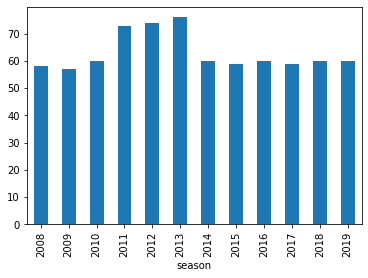

In [9]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [10]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [11]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

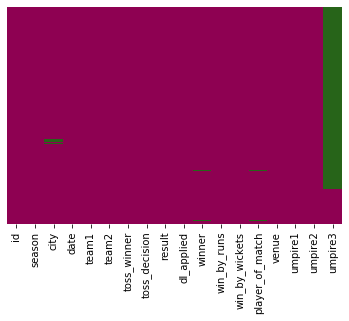

In [12]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [13]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [14]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

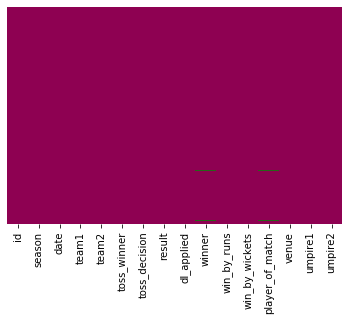

In [15]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Kolkata Knight Riders(KKR) and Kings XI Punjab(KXIP).so we only want information between the matches that had take place between them.

In [16]:
KXIP_KKR1=Matches.loc[(Matches['team1']=='Kolkata Knight Riders')&(Matches['team2'] =='Kings XI Punjab')]
KXIP_KKR1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
195,196,2010,Chandigarh,2010-03-27,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,39,0,MK Tiwary,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
207,208,2010,Kolkata,2010-04-04,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,8,DPMD Jayawardene,Eden Gardens,S Asnani,DJ Harper,NaN
513,514,2014,Kolkata,2014-05-27,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,UT Yadav,Eden Gardens,NJ Llong,S Ravi,NaN
607,608,2016,Kolkata,2016-05-04,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,7,0,AD Russell,Eden Gardens,AK Chaudhary,HDPK Dharmasena,NaN
653,7911,2018,Kolkata,21/04/18,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,1,Kings XI Punjab,0,9,KL Rahul,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
679,7937,2018,Indore,12/05/18,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,31,0,SP Narine,Holkar Cricket Stadium,O Nandan,Virender Kumar Sharma,Bruce Oxenford
701,11142,2019,Kolkata,27/03/19,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,AD Russell,Eden Gardens,Anil Chaudhary,Vineet Kulkarni,Chris Gaffaney


In [19]:
KXIP_KKR2=Matches.loc[(Matches['team2']=='Kolkata Knight Riders')&(Matches['team1'] =='Kings XI Punjab')]

In [20]:
KXIP_KKR2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
47,48,2017,Chandigarh,2017-05-09,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,S Ravi,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
111,112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
269,270,2011,Kolkata,2011-04-30,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,Iqbal Abdulla,Eden Gardens,AM Saheba,SL Shastri,NaN
324,325,2012,Kolkata,2012-04-15,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani,NaN
329,330,2012,Chandigarh,2012-04-18,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,8,G Gambhir,"Punjab Cricket Association Stadium, Mohali",JD Cloete,RJ Tucker,NaN
399,400,2013,Chandigarh,2013-04-16,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,4,0,MS Gony,"Punjab Cricket Association Stadium, Mohali",CK Nandan,SJA Taufel,NaN
414,415,2013,Kolkata,2013-04-26,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,6,JH Kallis,Eden Gardens,CK Nandan,S Ravi,NaN


In [21]:
KXIP_KKR=KXIP_KKR1.append(KXIP_KKR2)

In [22]:
KXIP_KKR

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
195,196,2010,Chandigarh,2010-03-27,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,39,0,MK Tiwary,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
207,208,2010,Kolkata,2010-04-04,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,8,DPMD Jayawardene,Eden Gardens,S Asnani,DJ Harper,NaN
513,514,2014,Kolkata,2014-05-27,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,UT Yadav,Eden Gardens,NJ Llong,S Ravi,NaN
607,608,2016,Kolkata,2016-05-04,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,7,0,AD Russell,Eden Gardens,AK Chaudhary,HDPK Dharmasena,NaN
653,7911,2018,Kolkata,21/04/18,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,1,Kings XI Punjab,0,9,KL Rahul,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
679,7937,2018,Indore,12/05/18,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,31,0,SP Narine,Holkar Cricket Stadium,O Nandan,Virender Kumar Sharma,Bruce Oxenford
701,11142,2019,Kolkata,27/03/19,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,AD Russell,Eden Gardens,Anil Chaudhary,Vineet Kulkarni,Chris Gaffaney
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
47,48,2017,Chandigarh,2017-05-09,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,S Ravi,NaN


In [23]:
KXIP_KKR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 141 to 747
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               25 non-null     int64 
 1   season           25 non-null     int64 
 2   city             25 non-null     object
 3   date             25 non-null     object
 4   team1            25 non-null     object
 5   team2            25 non-null     object
 6   toss_winner      25 non-null     object
 7   toss_decision    25 non-null     object
 8   result           25 non-null     object
 9   dl_applied       25 non-null     int64 
 10  winner           25 non-null     object
 11  win_by_runs      25 non-null     int64 
 12  win_by_wickets   25 non-null     int64 
 13  player_of_match  25 non-null     object
 14  venue            25 non-null     object
 15  umpire1          25 non-null     object
 16  umpire2          25 non-null     object
 17  umpire3          4 non-null      o

# # Complete details of matches that takes placed between KXIP and KKR

In [24]:
KXIP_KKR.describe

<bound method NDFrame.describe of         id  season            city        date                  team1  \
141    142    2009  Port Elizabeth  2009-05-03  Kolkata Knight Riders   
195    196    2010      Chandigarh  2010-03-27  Kolkata Knight Riders   
207    208    2010         Kolkata  2010-04-04  Kolkata Knight Riders   
513    514    2014         Kolkata  2014-05-27  Kolkata Knight Riders   
607    608    2016         Kolkata  2016-05-04  Kolkata Knight Riders   
653   7911    2018         Kolkata    21/04/18  Kolkata Knight Riders   
679   7937    2018          Indore    12/05/18  Kolkata Knight Riders   
701  11142    2019         Kolkata    27/03/19  Kolkata Knight Riders   
10      11    2017         Kolkata  2017-04-13        Kings XI Punjab   
47      48    2017      Chandigarh  2017-05-09        Kings XI Punjab   
80      81    2008      Chandigarh  2008-05-03        Kings XI Punjab   
111    112    2008         Kolkata  2008-05-25        Kings XI Punjab   
122    123    200

In [26]:
print("No of matches that takes place between KXIP and KKR:",len(KXIP_KKR))

No of matches that takes place between KXIP and KKR: 25


#  Below plot gives the details of the match that takes place between KKR and KXIP

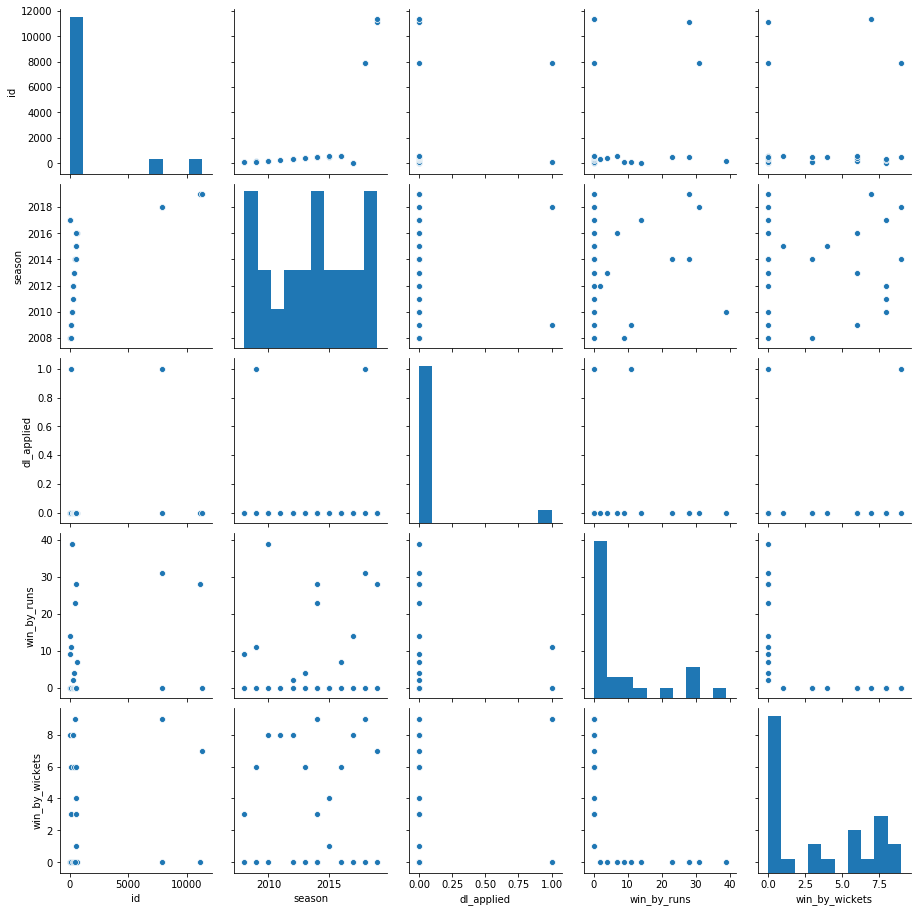

In [27]:
sns.pairplot(KXIP_KKR)

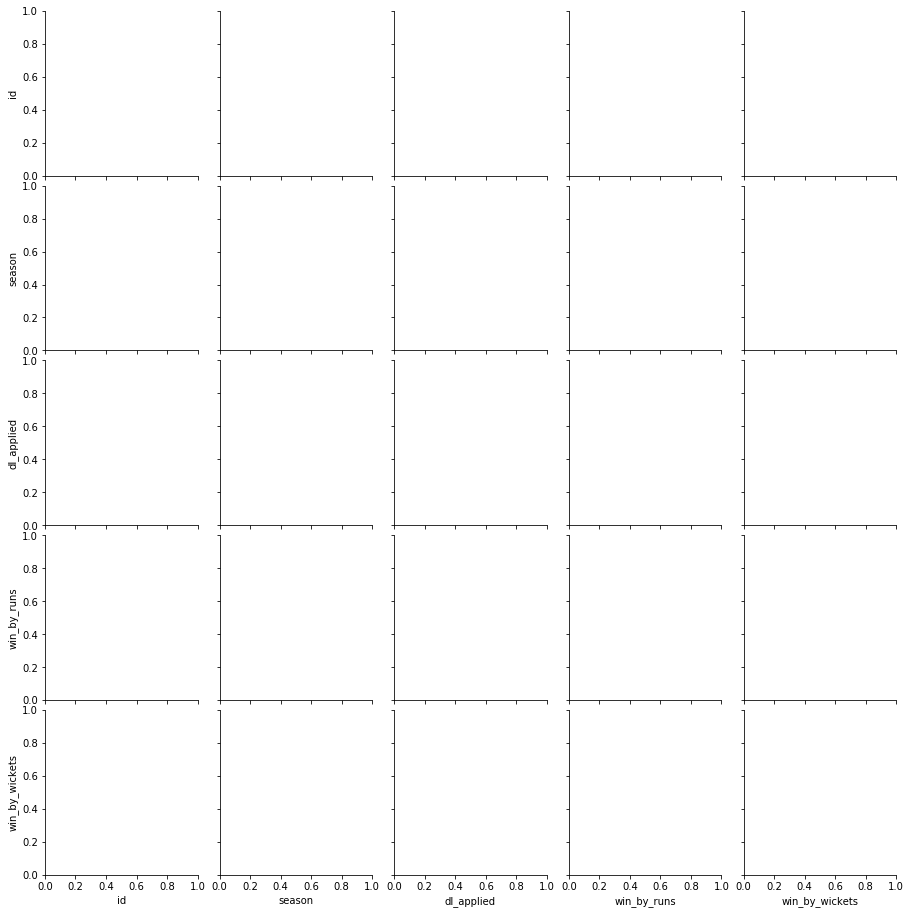

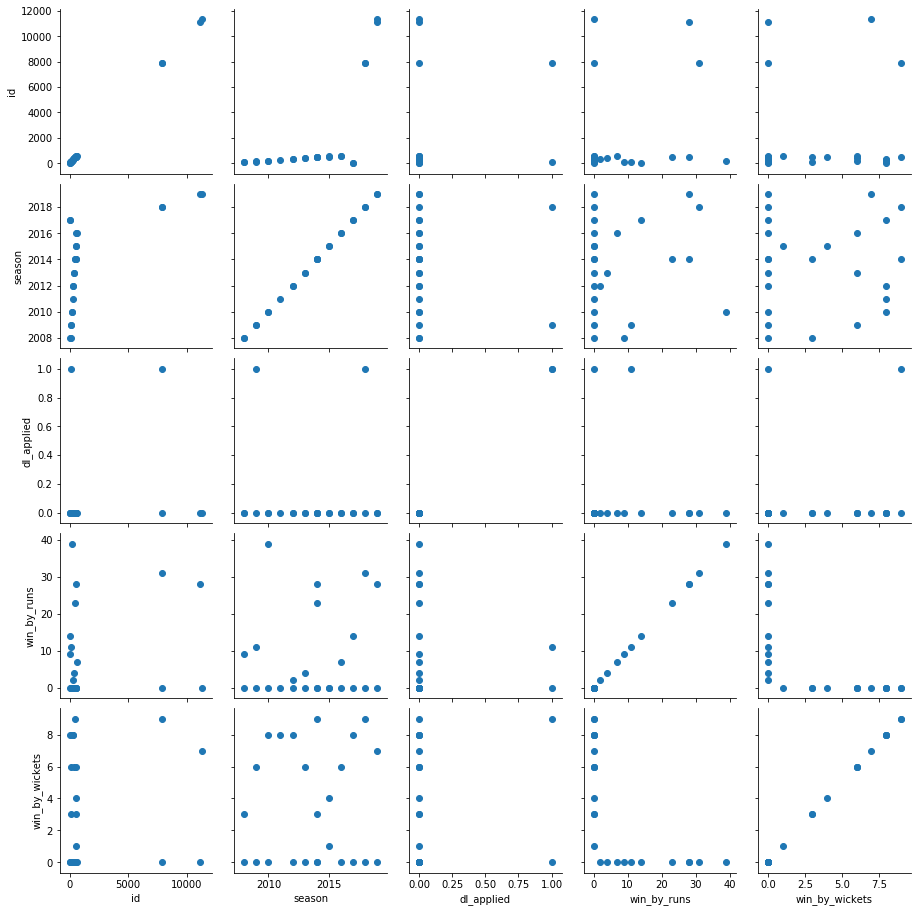

In [28]:
sns.PairGrid(KXIP_KKR)
g=sns.PairGrid(KXIP_KKR)
g.map(plt.scatter)

#  It looks like  KKR win the Toss 15 Times and 9 Times KXIP won the Toss

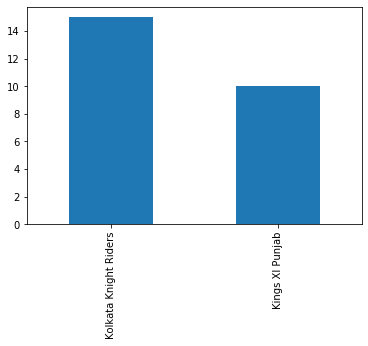

In [29]:
KXIP_KKR['toss_winner'].value_counts().plot(kind='bar')

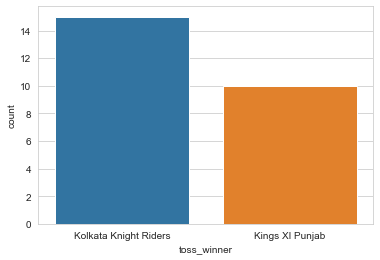

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=KXIP_KKR)

# KKR went on to win the match 5 times by  batting first and 12 times by Batting second against KXIP .so total it is (KKR=win-17,loss-8)whereas for KXIP they win the match 3 times by batting first and win 5 times by batting first against KKR.so it is (KXIP=win-8,loss=17)

In [30]:
KXIP_SRH.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
621,622,2016,Chandigarh,2016-05-15,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,7,HM Amla,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,M Erasmus,NaN
651,7909,2018,Mohali,19/04/18,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Kings XI Punjab,15,0,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",Nigel Llong,Anil Chaudhary,Vineet Kulkarni


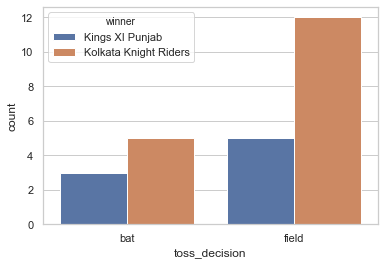

In [31]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=KXIP_KKR)

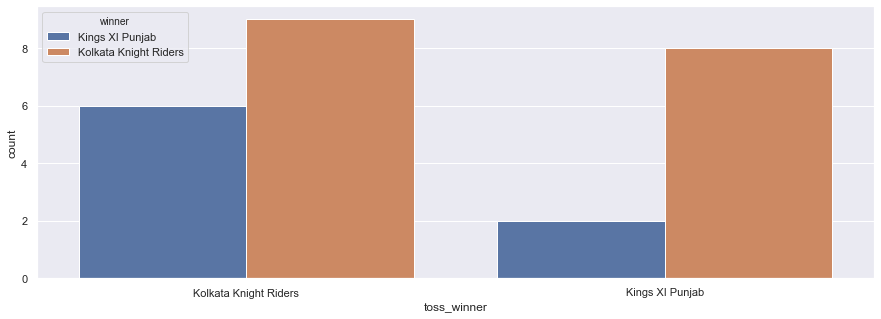

In [32]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=KXIP_KKR)

In [34]:
print("No of times toss win by both teams:")
KXIP_KKR['toss_winner'].value_counts()

No of times toss win by both teams:


Kolkata Knight Riders    15
Kings XI Punjab          10
Name: toss_winner, dtype: int64

# Punjab win 8 times and Kolkata win 17 times from 25 matches")

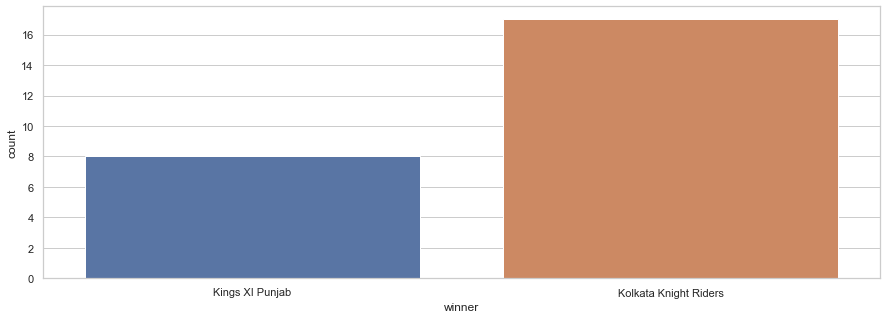

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=KXIP_KKR)

# correlation between Columns in Matches Dataset

In [37]:
KXIP_KKR.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.652107,0.187951,0.239192,0.056303
season,0.652107,1.000000,-0.012341,0.118646,0.057208
dl_applied,0.187951,-0.012341,1.000000,-0.058240,0.088176
win_by_runs,0.239192,0.118646,-0.058240,1.000000,-0.642133
win_by_wickets,0.056303,0.057208,0.088176,-0.642133,1.000000


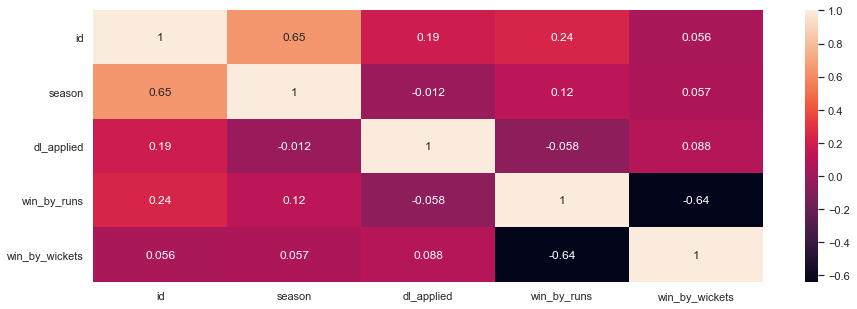

In [38]:
sns.heatmap(KXIP_KKR.corr(),yticklabels=True,annot=True)

In [39]:
KXIP_KKR['winner']=pd.get_dummies(KXIP_KKR['winner'])

In [40]:
KXIP_KKR.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,1,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
195,196,2010,Chandigarh,2010-03-27,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,0,39,0,MK Tiwary,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN


# Using Sweetviz we can get details about the Matches

In [41]:
import sweetviz 
my_report=sweetviz.analyze([KXIP_KKR,'KXIP_KKR'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [50]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [42]:
Deliveries=pd.read_csv("deliveries.csv")

In [43]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [44]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [45]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Filtering the match details that only takes place between Kolkata Knight Riders and  Kings XI Punjab

In [46]:
Kolkata_Punjab1=Deliveries.loc[(Deliveries['batting_team' ] =='Kings XI Punjab' ) & (Deliveries['bowling_team'] == 'Kolkata Knight Riders')]

In [47]:
Kolkata_Punjab1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177051,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,2,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177052,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,3,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177053,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,4,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177054,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,5,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [50]:
Kolkata_Punjab2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kings XI Punjab' ) & (Deliveries['batting_team'] == 'Kolkata Knight Riders')]

In [51]:
Kolkata_Punjab2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2485,11,2,Kolkata Knight Riders,Kings XI Punjab,1,1,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2486,11,2,Kolkata Knight Riders,Kings XI Punjab,1,2,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2487,11,2,Kolkata Knight Riders,Kings XI Punjab,1,3,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2488,11,2,Kolkata Knight Riders,Kings XI Punjab,1,4,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2489,11,2,Kolkata Knight Riders,Kings XI Punjab,1,5,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [52]:
Kolkata_Punjab=Kolkata_Punjab1.append(Kolkata_Punjab2)

# Complete Details Of Kolkata vs Punjab

In [53]:
Kolkata_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


# using Match_id we can summarize that 25 matches were played between KXIP and KKR

In [55]:
len(Kolkata_Punjab['match_id'].value_counts())

25

In [54]:
Kolkata_Punjab['match_id'].value_counts()

196      255
7937     251
11142    249
142      249
112      248
400      248
48       248
608      247
81       247
560      246
514      245
517      245
325      243
208      239
472      237
11343    234
11       234
491      233
270      233
415      233
589      231
532      231
330      222
7911     197
123      187
Name: match_id, dtype: int64

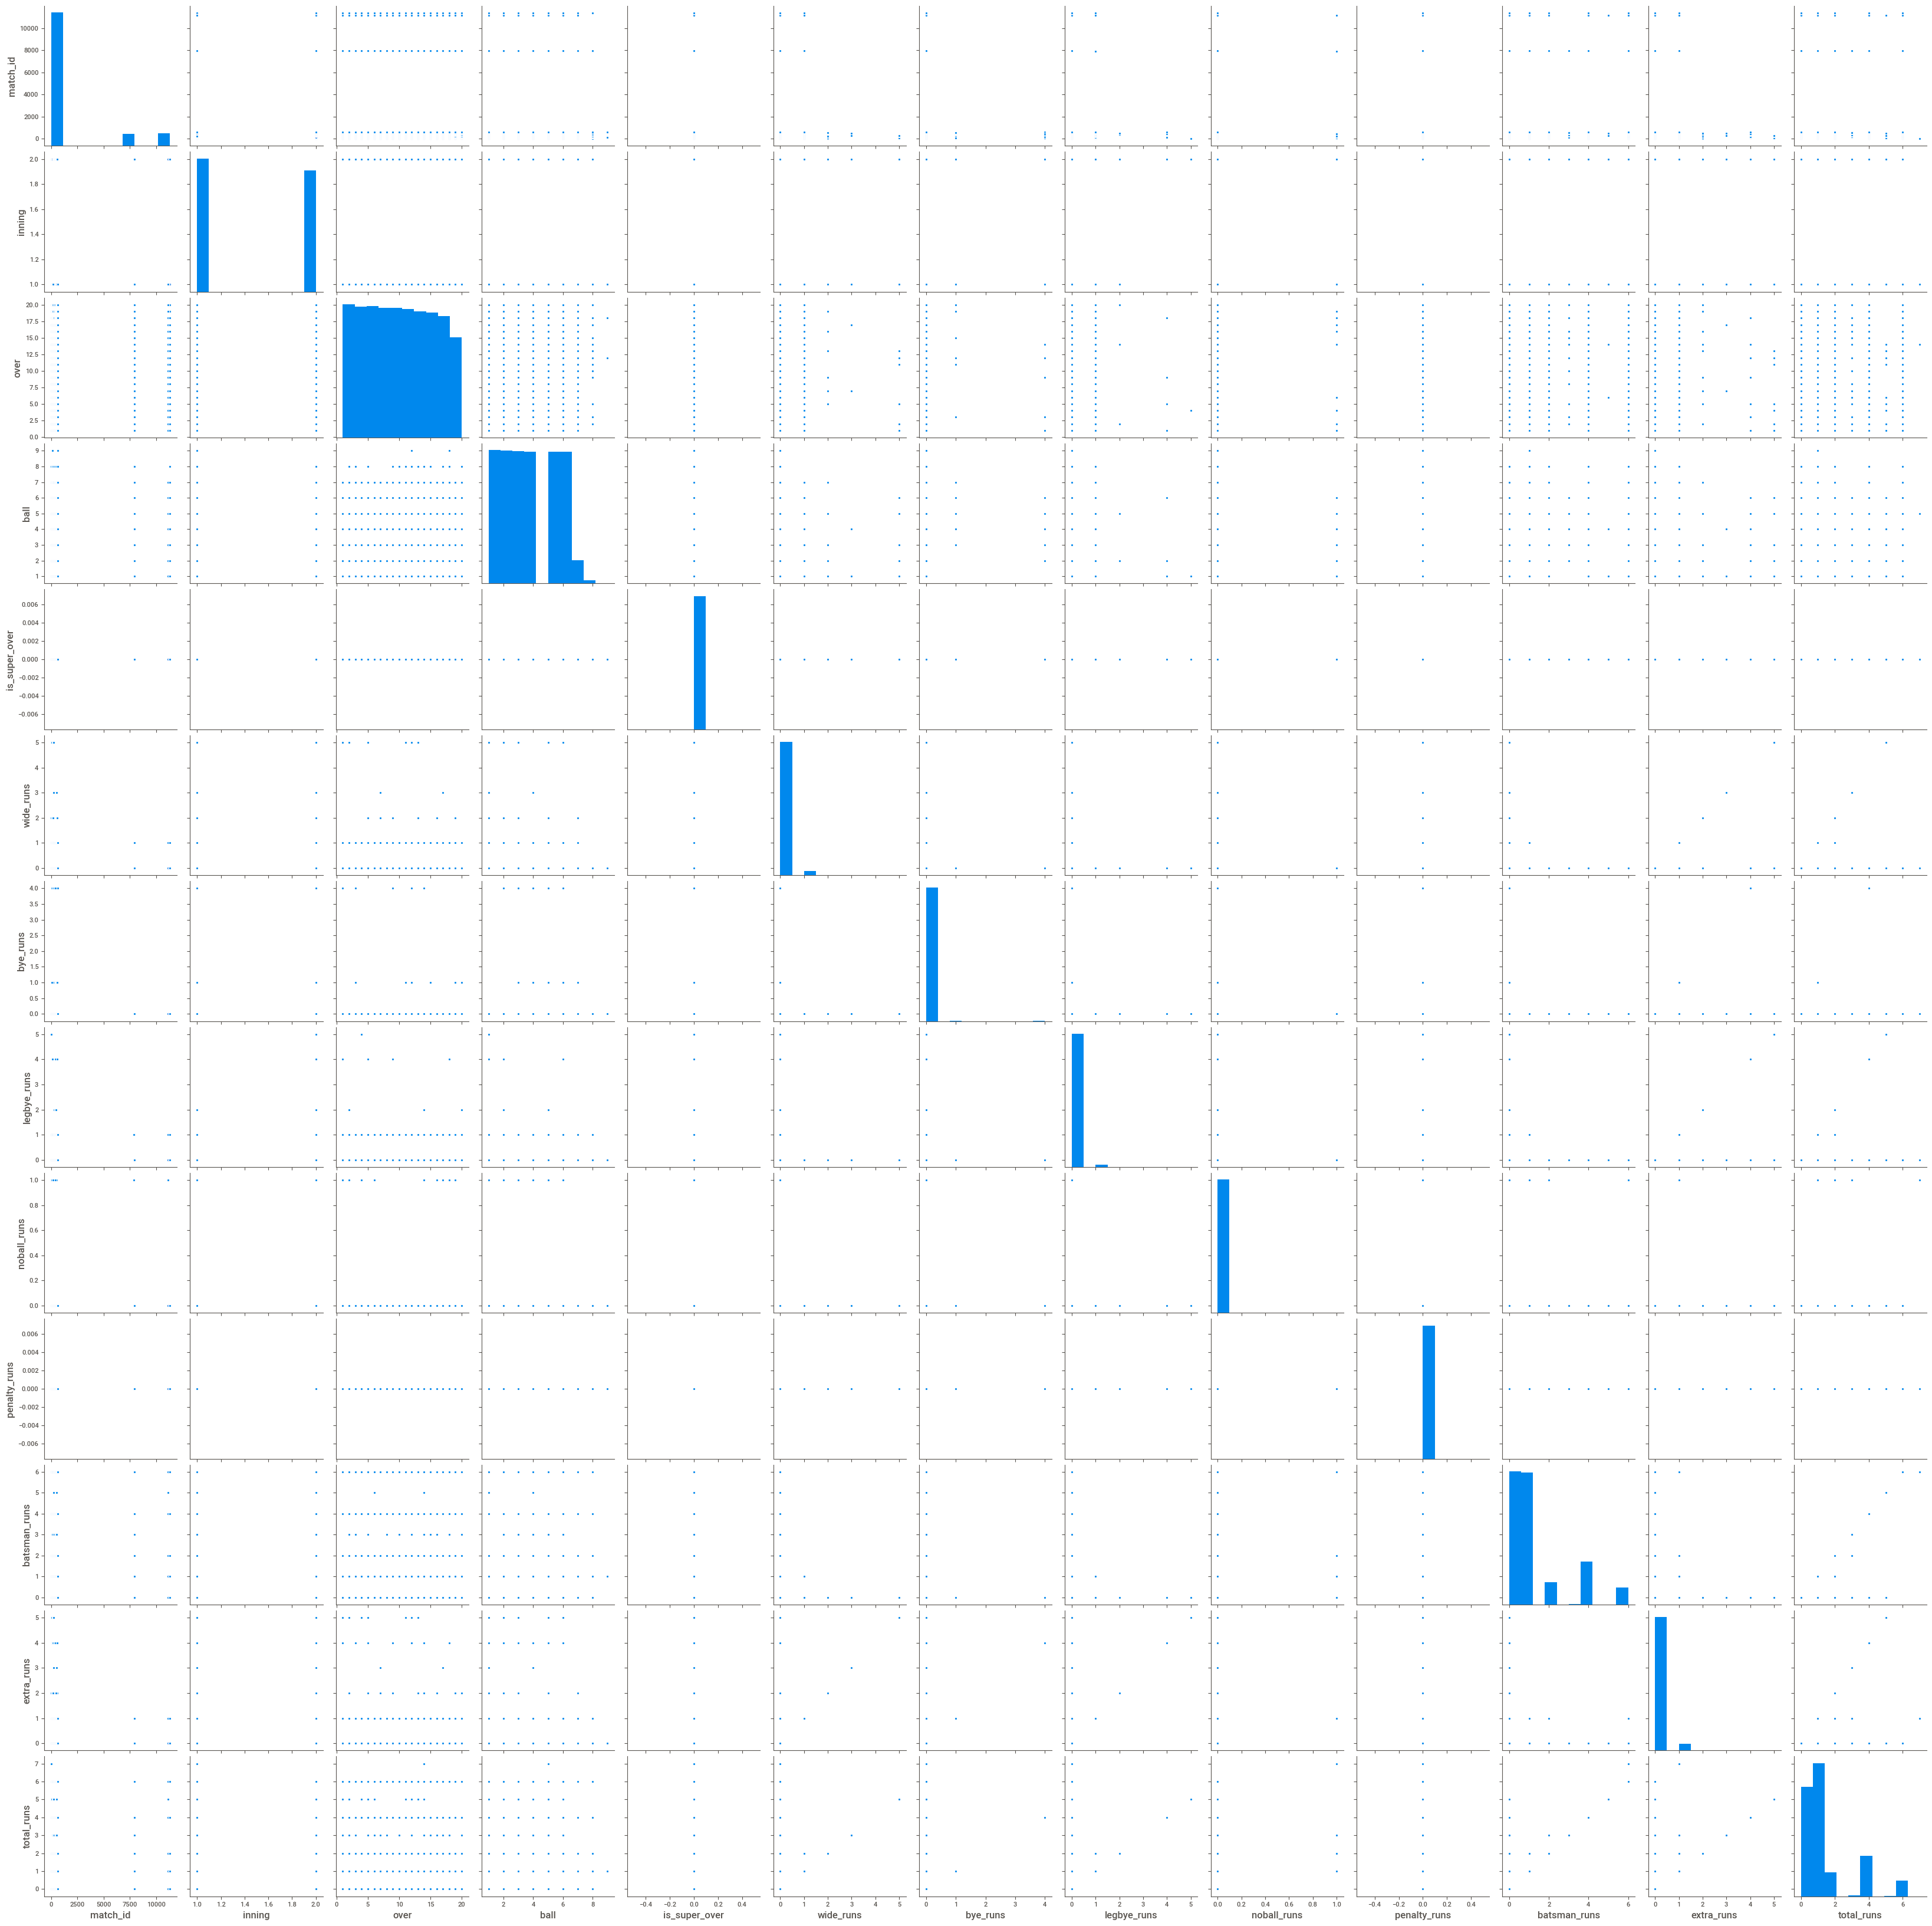

In [56]:
sns.pairplot(Kolkata_Punjab)

# It is difficult to interpret covariance.Let's try correlation

In [57]:
Kolkata_Punjab.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.194095e+07,-7.872617,12.862215,23.589122,0.0,-5.333871,-10.743250,-14.616059,0.242193,0.0,517.216823,-30.450988,486.765835
inning,-7.872617e+00,0.249493,-0.176642,-0.006485,0.0,-0.000472,-0.001175,0.001639,-0.000715,0.0,0.007056,-0.000724,0.006333
over,1.286221e+01,-0.176642,32.159293,-0.077275,0.0,-0.013703,0.011568,-0.000755,0.000869,0.0,0.779316,-0.002021,0.777295
ball,2.358912e+01,-0.006485,-0.077275,3.252217,0.0,0.005764,0.004398,-0.008593,-0.000292,0.0,-0.029273,0.001277,-0.027995
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,-5.333871e+00,-0.000472,-0.013703,0.005764,0.0,0.060983,-0.000278,-0.000732,-0.000069,0.0,-0.042967,0.059904,0.016937
bye_runs,-1.074325e+01,-0.001175,0.011568,0.004398,0.0,-0.000278,0.023550,-0.000145,-0.000014,0.0,-0.009652,0.023113,0.013461
legbye_runs,-1.461606e+01,0.001639,-0.000755,-0.008593,0.0,-0.000732,-0.000145,0.031653,-0.000036,0.0,-0.024098,0.030739,0.006641
noball_runs,2.421928e-01,-0.000715,0.000869,-0.000292,0.0,-0.000069,-0.000014,-0.000036,0.001851,0.0,-0.000221,0.001732,0.001511
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [58]:
Kolkata_Punjab.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,-0.004561,0.000656,0.003785,NaN,-0.006251,-0.020259,-0.023774,0.001629,NaN,0.091208,-0.025931,0.086457
inning,-0.004561,1.000000,-0.062361,-0.007200,NaN,-0.003825,-0.015329,0.018438,-0.033282,NaN,0.008608,-0.004262,0.007781
over,0.000656,-0.062361,1.000000,-0.007556,NaN,-0.009785,0.013293,-0.000748,0.003561,NaN,0.083742,-0.001049,0.084126
ball,0.003785,-0.007200,-0.007556,1.000000,NaN,0.012943,0.015890,-0.026782,-0.003758,NaN,-0.009891,0.002084,-0.009528
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,-0.006251,-0.003825,-0.009785,0.012943,NaN,1.000000,-0.007326,-0.016660,-0.006533,NaN,-0.106026,0.713810,0.042095
bye_runs,-0.020259,-0.015329,0.013293,0.015890,NaN,-0.007326,1.000000,-0.005314,-0.002084,NaN,-0.038328,0.443199,0.053837
legbye_runs,-0.023774,0.018438,-0.000748,-0.026782,NaN,-0.016660,-0.005314,1.000000,-0.004738,NaN,-0.082539,0.508417,0.022911
noball_runs,0.001629,-0.033282,0.003561,-0.003758,NaN,-0.006533,-0.002084,-0.004738,1.000000,NaN,-0.003133,0.118439,0.021549
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

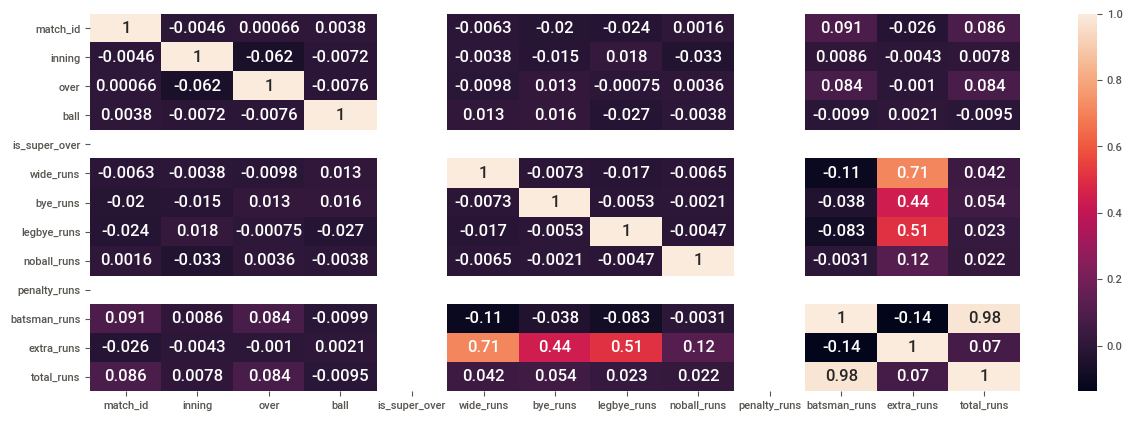

In [59]:
sns.heatmap(Kolkata_Punjab.corr(),yticklabels=True,annot=True)

In [60]:
Kolkata_Punjab.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,5932.000000,5932.000000,5932.000000,5932.000000,5932.0,5932.000000,5932.000000,5932.000000,5932.000000,5932.0,5932.000000,5932.000000,5932.000000
mean,1793.050405,1.476568,10.167903,3.611767,0.0,0.037424,0.007417,0.019555,0.001854,0.0,1.301079,0.066251,1.367330
std,3455.567725,0.499493,5.670916,1.803390,0.0,0.246948,0.153459,0.177912,0.043026,0.0,1.641041,0.339836,1.629302
min,11.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,196.000000,1.000000,5.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,415.000000,1.000000,10.000000,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,560.000000,2.000000,15.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,2.000000
max,11343.000000,2.000000,20.000000,9.000000,0.0,5.000000,4.000000,5.000000,1.000000,0.0,6.000000,5.000000,7.000000


In [61]:
Kolkata_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


# Glenn_Maxwell_Contribution to his Team Score

In [141]:
Glenn_Maxwell_Contribution=Kolkata_Punjab1.loc[(Kolkata_Punjab1['batsman']=='GJ Maxwell')]

In [142]:
Glenn_Maxwell_Contribution

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2407,11,1,Kings XI Punjab,Kolkata Knight Riders,8,5,GJ Maxwell,HM Amla,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2409,11,1,Kings XI Punjab,Kolkata Knight Riders,9,1,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2410,11,1,Kings XI Punjab,Kolkata Knight Riders,9,2,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2411,11,1,Kings XI Punjab,Kolkata Knight Riders,9,3,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2414,11,1,Kings XI Punjab,Kolkata Knight Riders,9,6,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143900,608,2,Kings XI Punjab,Kolkata Knight Riders,15,2,GJ Maxwell,DA Miller,Shakib Al Hasan,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
143901,608,2,Kings XI Punjab,Kolkata Knight Riders,15,3,GJ Maxwell,DA Miller,Shakib Al Hasan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
143904,608,2,Kings XI Punjab,Kolkata Knight Riders,15,6,GJ Maxwell,DA Miller,Shakib Al Hasan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
143906,608,2,Kings XI Punjab,Kolkata Knight Riders,16,2,GJ Maxwell,DA Miller,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [143]:
Kolkata_Punjab1.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
11,130,1349,493,0,13,0,1,2,0,154,16,170
48,126,1317,462,0,6,2,4,0,0,155,12,167
81,125,1321,455,0,4,4,5,1,0,164,14,178
112,126,1300,462,0,10,0,1,0,0,163,11,174
123,127,1365,473,0,11,1,0,0,0,146,12,158
142,252,1307,464,0,8,0,2,0,0,144,10,154
196,250,1295,456,0,5,1,0,0,0,138,6,144
208,224,1074,395,0,2,0,3,0,0,199,5,204
270,124,1291,448,0,5,1,0,0,0,113,6,119


In [144]:
Glenn_Maxwell_Contribution.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
11,14,141,42,0,0,0,0,0,0,25,0,25
48,27,332,104,0,2,0,1,0,0,44,3,47
472,13,81,54,0,1,0,1,0,0,15,2,17
491,14,118,47,0,0,0,0,0,0,14,0,14
514,18,67,32,0,0,0,1,0,0,6,1,7
517,1,18,6,0,0,0,0,0,0,0,0,0
532,28,240,109,0,2,4,0,0,0,33,6,39
560,22,316,83,0,0,1,1,0,0,43,2,45
589,9,123,39,0,2,0,0,0,0,4,2,6


In [145]:
print("In match id-11 Glenn maxwell scored  25 runs from the team score of 170 runs")
print("In match id-48 Glenn maxwell scored  44 runs from the team score of 167 runs")
print("In match id-472 Glenn maxwell scored 15 runs from the team score of 132 runs")
print("In match id-491 Glenn maxwell scored  14 runs from the team score of 149 runs")
print("In match id-514 Glenn maxwell scored  6 runs from the team score of 135 runs")
print("In match id-517 Glenn maxwell scored  0 runs from the team score of 199 runs")
print("In match id-532 Glenn maxwell scored  33 runs from the team score of 155 runs")
print("In match id-560 Glenn maxwell scored  43 runs from the team score of 183 runs")
print("In match id-589 Glenn maxwell scored  4 runs from the team score of 138 runs")
print("In match id-608 Glenn maxwell scored  68 runs from the team score of 157 runs")


In match id-11 Glenn maxwell scored  25 runs from the team score of 170 runs
In match id-48 Glenn maxwell scored  44 runs from the team score of 167 runs
In match id-472 Glenn maxwell scored 15 runs from the team score of 132 runs
In match id-491 Glenn maxwell scored  14 runs from the team score of 149 runs
In match id-514 Glenn maxwell scored  6 runs from the team score of 135 runs
In match id-517 Glenn maxwell scored  0 runs from the team score of 199 runs
In match id-532 Glenn maxwell scored  33 runs from the team score of 155 runs
In match id-560 Glenn maxwell scored  43 runs from the team score of 183 runs
In match id-589 Glenn maxwell scored  4 runs from the team score of 138 runs
In match id-608 Glenn maxwell scored  68 runs from the team score of 157 runs


In [146]:
print("In match id-11 Glenn maxwell contribution to his team score was",(25/170)*100)
print("In match id-48 Glenn maxwell contribution to his team score was",(44/167)*100)
print("In match id-472 Glenn maxwell contribution to his team score was",(15/132)*100)
print("In match id-491 Glenn maxwell contribution to his team score was",(14/149)*100)
print("In match id-514 Glenn maxwell contribution to his team score was",(6/135)*100)
print("In match id-517 Glenn maxwell contribution to his team score was",(0/199)*100)
print("In match id-532 Glenn maxwell contribution to his team score was",(33/155)*100)
print("In match id-560 Glenn maxwell contribution to his team score was",(43/183)*100)
print("In match id-589 Glenn maxwell contribution to his team score was",(4/138)*100)
print("In match id-608 Glenn maxwell contribution to his team score was",(68/157)*100)


In match id-11 Glenn maxwell contribution to his team score was 14.705882352941178
In match id-48 Glenn maxwell contribution to his team score was 26.34730538922156
In match id-472 Glenn maxwell contribution to his team score was 11.363636363636363
In match id-491 Glenn maxwell contribution to his team score was 9.395973154362416
In match id-514 Glenn maxwell contribution to his team score was 4.444444444444445
In match id-517 Glenn maxwell contribution to his team score was 0.0
In match id-532 Glenn maxwell contribution to his team score was 21.29032258064516
In match id-560 Glenn maxwell contribution to his team score was 23.497267759562842
In match id-589 Glenn maxwell contribution to his team score was 2.898550724637681
In match id-608 Glenn maxwell contribution to his team score was 43.31210191082803


In [147]:
print("Average Contribution by Glenn maxwell in a single match",(14.705882352941178+26.34730538922156+11.363636363636363+9.395973154362416+4.444444444444445+0.0+21.29032258064516+23.497267759562842+2.898550724637681+43.31210191082803)//10)

Average Contribution by Glenn maxwell in a single match 15.0


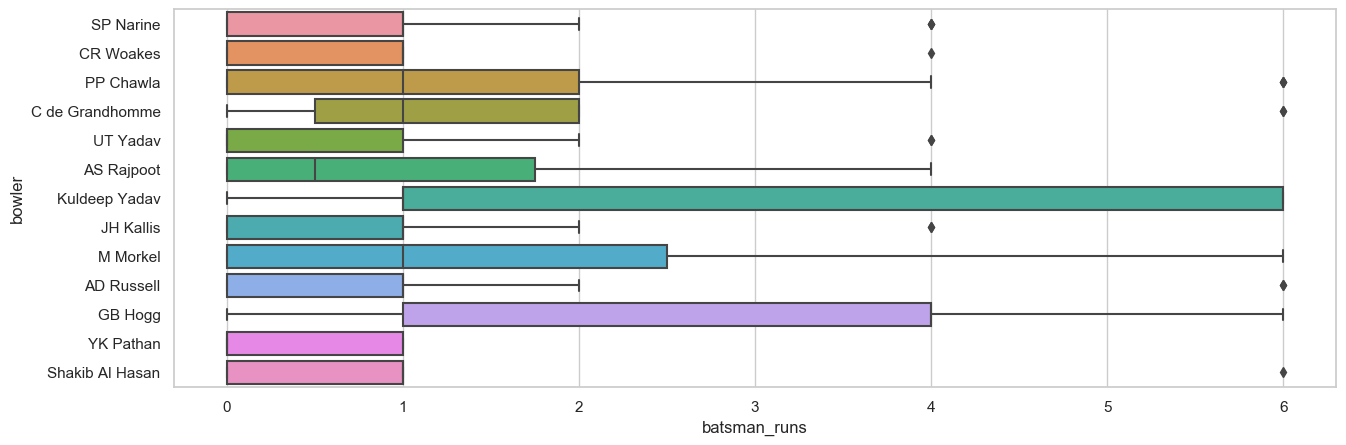

In [148]:
sns.boxplot(x='batsman_runs',y='bowler',data=Glenn_Maxwell_Contribution)

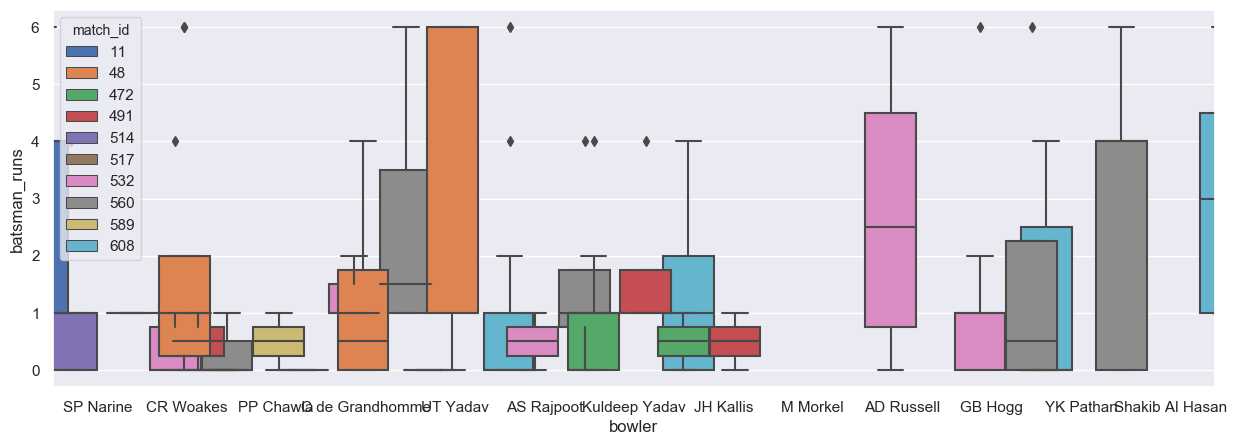

<Figure size 3500x500 with 0 Axes>

In [156]:
sns.set_style("whitegrid")
sns.set()
ax=sns.boxplot(y='batsman_runs',x='bowler',hue='match_id',saturation=10.75,width=5.8,data=Glenn_Maxwell_Contribution)
plt.figure(figsize=(35,5))
plt.show()

In [80]:
Glenn_Maxwell_Contribution=sweetviz.analyze([Glenn_Maxwell_Contribution,'Glenn_Maxwell_Contribution'])

:FEATURES DONE:                    |                     | [  0%]   00:06  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [81]:
Glenn_Maxwell_Contribution.show_html()

# How many no balls will be bowled in the match?

In [83]:
len(Kolkata_Punjab['match_id'].value_counts())

25

In [84]:
Kolkata_Punjab.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
11,338,2243,872,0,18,0,7,2,0,314,27,341
48,370,2600,896,0,8,2,6,0,0,304,16,320
81,369,2588,889,0,10,5,5,1,0,326,21,347
112,370,2548,899,0,14,0,6,0,0,329,20,349
123,247,1665,694,0,15,1,0,0,0,221,16,237
142,375,2588,905,0,12,0,5,0,0,290,17,307
196,380,2652,948,0,13,9,0,2,0,303,24,327
208,351,2407,866,0,13,0,4,1,0,386,18,404
270,342,2305,843,0,16,1,1,0,0,221,18,239


In [85]:
Kolkata_Punjab['noball_runs'].value_counts()

0    5921
1      11
Name: noball_runs, dtype: int64

In [87]:
print("Average no of no balls bowled in a match",11/25)
print("so no balls bowled in a match will be 0-1")

Average no of no balls bowled in a match 0.44
so no balls bowled in a match will be 0-1


# How many wickets will Fall from 90th to 120th ball of both the innings?

In [88]:
wickets_from_90th_120th_ball=Kolkata_Punjab.loc[(Kolkata_Punjab['over']>=15)]

In [91]:
wickets_from_90th_120th_ball.tail(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177168,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,7,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [95]:
len(Kolkata_Punjab['match_id'].value_counts())

25

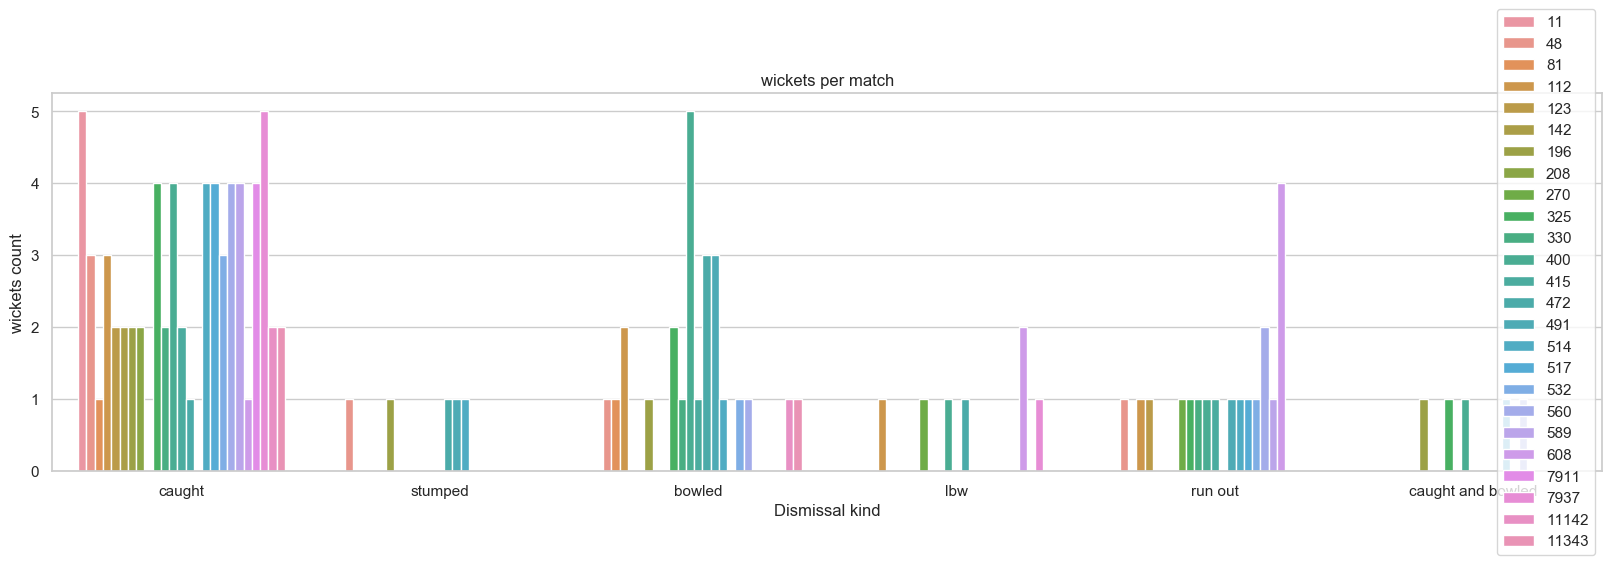

In [130]:
plt.figure(figsize=(20,5))
sns.set()
sns.set_style('whitegrid')
ax=sns.countplot(x='dismissal_kind',hue='match_id',data=wickets_from_90th_120th_ball)
ax.set(xlabel="Dismissal kind",ylabel="wickets count",title="wickets per match")
plt.legend(loc='right')
plt.show()


In [ ]:
wickets_from_90th_120th_ball['dismissal_kind'].value_counts()

In [ ]:
print("Average number of wickets fall from 90th to 120th ball of both the innings",(127/25))
print("so number of wickets fall from 90th to 120th ball of both innings between 5-6")

# How  many dot balls will be bowled in the entire match?

In [ ]:
Dot_Balls_Bowled=Kolkata_Punjab.loc[(Kolkata_Punjab['batsman_runs']==0)&(Kolkata_Punjab['total_runs']==0)]

In [106]:
Dot_Balls_Bowled

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2360,11,1,Kings XI Punjab,Kolkata Knight Riders,1,6,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2363,11,1,Kings XI Punjab,Kolkata Knight Riders,2,3,M Vohra,HM Amla,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2364,11,1,Kings XI Punjab,Kolkata Knight Riders,2,4,M Vohra,HM Amla,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177145,11343,2,Kolkata Knight Riders,Kings XI Punjab,15,2,AD Russell,S Gill,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177147,11343,2,Kolkata Knight Riders,Kings XI Punjab,15,4,AD Russell,S Gill,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177148,11343,2,Kolkata Knight Riders,Kings XI Punjab,15,5,AD Russell,S Gill,Mohammed Shami,0,...,0,0,0,0,0,0,0,AD Russell,caught,AJ Tye
177153,11343,2,Kolkata Knight Riders,Kings XI Punjab,16,4,S Gill,KD Karthik,S Curran,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [107]:
len(Dot_Balls_Bowled['match_id'].value_counts())

25

In [108]:
Dot_Balls_Bowled.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
11,104,716,324,0,0,0,0,0,0,0,0,0
48,113,664,278,0,0,0,0,0,0,0,0,0
81,134,726,317,0,0,0,0,0,0,0,0,0
112,142,859,328,0,0,0,0,0,0,0,0,0
123,98,556,255,0,0,0,0,0,0,0,0,0
142,128,706,307,0,0,0,0,0,0,0,0,0
196,130,701,315,0,0,0,0,0,0,0,0,0
208,72,447,212,0,0,0,0,0,0,0,0,0
270,141,870,368,0,0,0,0,0,0,0,0,0


In [ ]:
sns.boxplot()

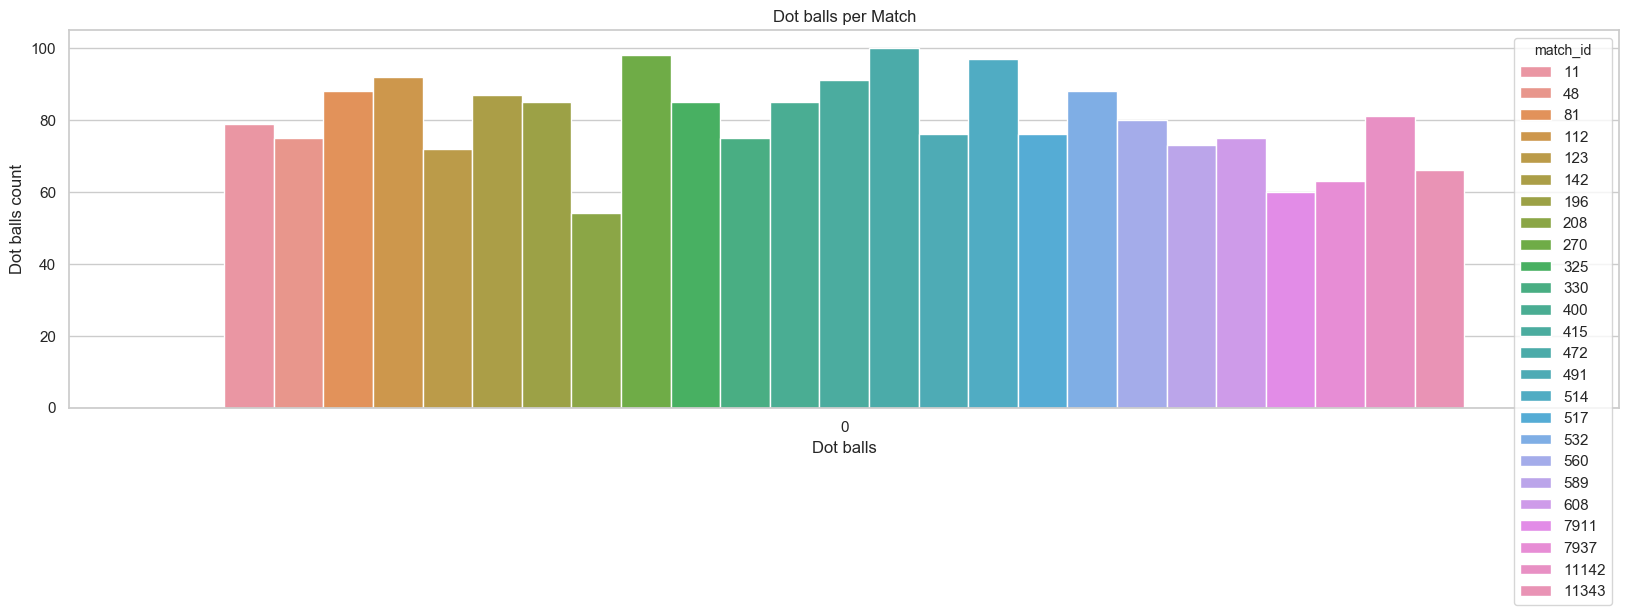

In [119]:
plt.figure(figsize=(20,5))
sns.set()
sns.set_style('whitegrid')
ax=sns.countplot(x='total_runs',hue='match_id',data=Dot_Balls_Bowled)
ax.set(xlabel="Dot balls",ylabel="Dot balls count",title="Dot balls per Match")
plt.show()

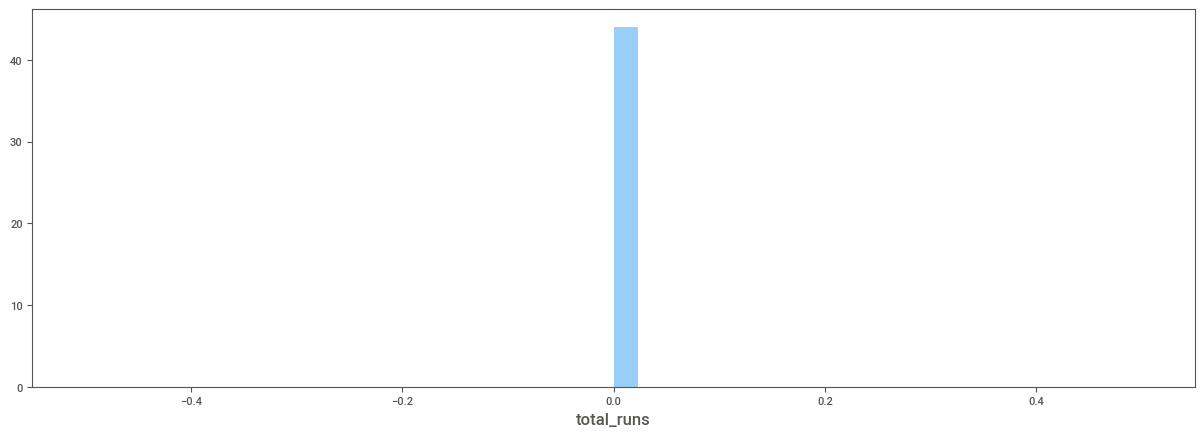

In [114]:
sns.distplot(Dot_Balls_Bowled['total_runs'])

In [109]:
Dot_Balls_Bowled.groupby(['match_id','ball']).size()

match_id  ball
11        1        8
          2       11
          3       11
          4       16
          5       10
                  ..
11343     3       10
          4       11
          5       11
          6       11
          7        2
Length: 178, dtype: int64

In [110]:
Dot_Balls_Bowled['ball'].value_counts()

4    342
2    336
6    331
5    318
1    314
3    297
7     55
8      8
Name: ball, dtype: int64

In [111]:
print("Average number of dot balls bowled in a match is",(342+336+331+318+314+297+55+8)//25)

Average number of dot balls bowled in a match is 80


# #  We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match.

#  We can predict the match results from this analysis but current form of  players plays an huge role in predicting the winner in this match.
# KXIP ll win the match.
# Average strike rate of David warner in a single match is 144.0(out).
# Average Contribution by KL Rahul in a single match 32.0.
# From 14 matches SRH took an average Of 38.0 balls to complete 50 runs in a single match.
# On an average from 4 matches Chris Gayle scored 11 runs in the First 10 balls
# These results are solely based on my analysis.Don't forget this year IPL has been played in UAE.So Data's from the past ll be contrary to the current stats.
